In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the application data into app_data variable
app_data = pd.read_csv('Downloads\\application_data.csv')


In [4]:
# This command allows us to view all the rows and columns without any row or column being collapsed
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
# Viewing first 5 records
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Viewing the shape of the dataset
app_data.shape

(307511, 122)

In [7]:
#Checking the table for it's structure, data types of different columns etc
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# Dropping duplicate records if any
app_data.drop_duplicates().shape

(307511, 122)

In [9]:
# Calculcating the percentage of null values and assigning to null_perc_app variable
null_perc_app = (app_data.isna().mean()*100)

In [10]:
# Assigning the the columns with more than 40% of null values to drop_cols variable

drop_cols = list(null_perc_app[null_perc_app>40].index)

In [11]:
# Dropping the columns stored in drop_cols variable from app_data
app_data = app_data.drop(drop_cols,axis=1)

In [12]:
# Viewing the shape of the dataset after dropping few features
app_data.shape

(307511, 73)

In [13]:
# As the FLAG_DOCUMENT columns don't have any significant value, hence considering them as extra columns
extra_cols = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [14]:
# Dropping the extra columns
app_data.drop(extra_cols,axis=1,inplace=True)

In [15]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking the data imbalance

In [16]:
# We are using value_counts() to find out the count of various values of TARGET column
app_data.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [17]:
# we are storing the value of count of 1's to count_of_defaulters variable

count_of_defaulters = app_data.TARGET.value_counts()[1]

In [18]:
# we are storing the count of 0's to count_of_nondefaulters variable

count_of_nondefaulters = app_data.TARGET.value_counts()[0]


# data_imbalance is the ratio of count_of_nondefaulters to count_of_defaulters

data_imbalance = count_of_nondefaulters/count_of_defaulters

print(round(data_imbalance,2))

11.39


From the above calculation we can understand that the data imbalance is of 11.39

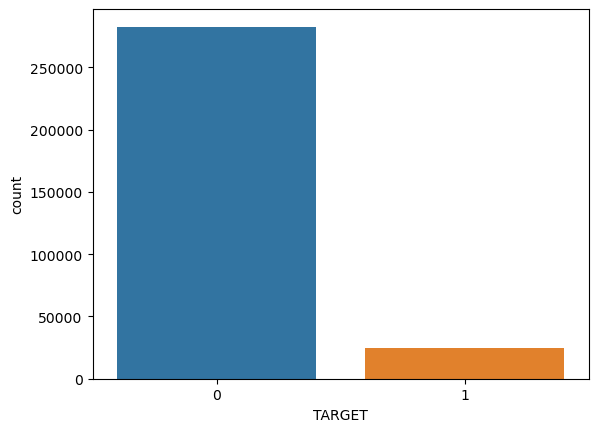

In [19]:
# The following graph shows the frequency distribution of the values of TARGET column 

sns.countplot(x=app_data['TARGET'])
plt.show()

In [20]:
# Viewing the statistical information about the dataset
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.0000

### Standardizing values

We can observe from the above commands that DAYS_ columns are having negative values so we would need to convert it to positive values and also it would be better to convert the days into years for gaining insights.

In [21]:
# Adding the days column names into list days
days = []
for i in app_data.columns:
    if 'DAYS' in i:
        days.append(i)


In [22]:
# Converting the negative values into positive values and converting days into years
for i in days:
    
    app_data[i] = app_data[i].apply(lambda x:abs(x)//365)

In [23]:
# Renaming the DAYS_ column to YEARS_ column
app_data.rename(columns = {'DAYS_BIRTH':'YEARS_BIRTH','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)

In [24]:
# Segmenting the columns into numerical columns and categorical columns and assigning to num_cols variable and cat_cols variable respectively.
# We have assumed that the column with more than 30 unique values is a categorical column as it is the most used industry standard for categorising the columns.

num_cols = []
cat_cols = []
for i in app_data.columns:
    if app_data[i].nunique()>30:
        num_cols.append(i)
    else:
        cat_cols.append(i)

In [25]:
# Removing the column ORGANIZATION_TYPE from numerical column and adding it to categorical column
# Even though there are more than 30 unique values in ORGANIZATION_TYPE column we consider it as a categorical column, as the values of this column are objects(strings) which cannot be subjected to the tests similar to numerical columns.
num_cols.remove('ORGANIZATION_TYPE')
cat_cols.append('ORGANIZATION_TYPE')

### Handling missing values

In [26]:
#Checking the percentage of null values in numerical columns
100*(app_data[num_cols].isna().mean())

SK_ID_CURR                     0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
REGION_POPULATION_RELATIVE     0.000000
YEARS_BIRTH                    0.000000
YEARS_EMPLOYED                 0.000000
YEARS_REGISTRATION             0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

In [27]:
# Replacing the null values with the median of particular numerical columns
for i in num_cols:
    if app_data[i].isna().mean()>0:
        app_data[i] = app_data[i].fillna(app_data[i].median())

In [28]:
#Confirming the percentage of null values in numerical columns is 0
100*(app_data[num_cols].isna().mean())

SK_ID_CURR                    0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
REGION_POPULATION_RELATIVE    0.0
YEARS_BIRTH                   0.0
YEARS_EMPLOYED                0.0
YEARS_REGISTRATION            0.0
EXT_SOURCE_2                  0.0
EXT_SOURCE_3                  0.0
OBS_30_CNT_SOCIAL_CIRCLE      0.0
OBS_60_CNT_SOCIAL_CIRCLE      0.0
dtype: float64

In [29]:
#Checking the percentage of null values in categorical columns
100*(app_data[cat_cols].isna().mean())

TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
YEARS_ID_PUBLISH                0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [30]:
# Replacing the null values of categorical columns with the mode of particular categorical columns
for i in cat_cols:
    if app_data[i].isna().mean()>0:
        app_data[i] = app_data[i].fillna(app_data[i].mode()[0])

In [31]:
#Confirming the percentage of null values in categorical columns is 0
100*(app_data[cat_cols].isna().mean())

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
YEARS_ID_PUBLISH               0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CI

In [32]:
# Checking the categorical columns for any discrepancy in their values
for i in cat_cols:
    print(app_data[i].value_counts())
    print('---------')

TARGET
0    282686
1     24825
Name: count, dtype: int64
---------
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
---------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
---------
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
---------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
---------
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
---------
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
---------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362

We see that there are around 4 values of XNA in CODE_GENDER column which may mean Not Available and it's safe to replace it with the mode of the column.

By doing do the analysis wouldn't be affected much as the number of values is very less.

But we can see that there are a large number of 'XNA'values in ORGANIZATION_TYPE column. We are not able to conclude anything about this value, so categorising it as a 'Missing value' looks as a better option.

In [33]:
# Mode of CODE_GENDER column
app_data['CODE_GENDER'].mode()[0]

'F'

In [34]:
#Replacing the XNA values of CODE_GENDER column with mode of the column in this case
app_data['CODE_GENDER'] = np.where(app_data['CODE_GENDER']=='XNA',app_data['CODE_GENDER'].mode()[0],app_data['CODE_GENDER'])

In [35]:
#Replacing the XNA values with 'Missing value'
app_data['ORGANIZATION_TYPE'] = np.where(app_data['ORGANIZATION_TYPE']=='XNA','Missing value',app_data['ORGANIZATION_TYPE'])

### Binning

Binning the YEARS_BIRTH will help in generating better insights like what age group of the clients was more among applicants

In [36]:
# AGE_BRACKETS is the variable into which the YEARS_BIRTH is split and stored.
bins = [0,20,30,40,50,60,70,80]
bracket = ['<20','20-30','30-40','40-50','50-60','60-70','70>']

# Here AGE_BRACKETS is being created as a new column and the age group generated is assigned to this column
app_data['AGE_BRACKETS'] = pd.cut(app_data['YEARS_BIRTH'],bins=bins,labels=bracket)

In [37]:
# Checking the count of different age groups in the column
app_data['AGE_BRACKETS'].value_counts()

AGE_BRACKETS
30-40    83117
40-50    74401
50-60    67819
20-30    52805
60-70    29368
<20          1
70>          0
Name: count, dtype: int64

### Handling outliers

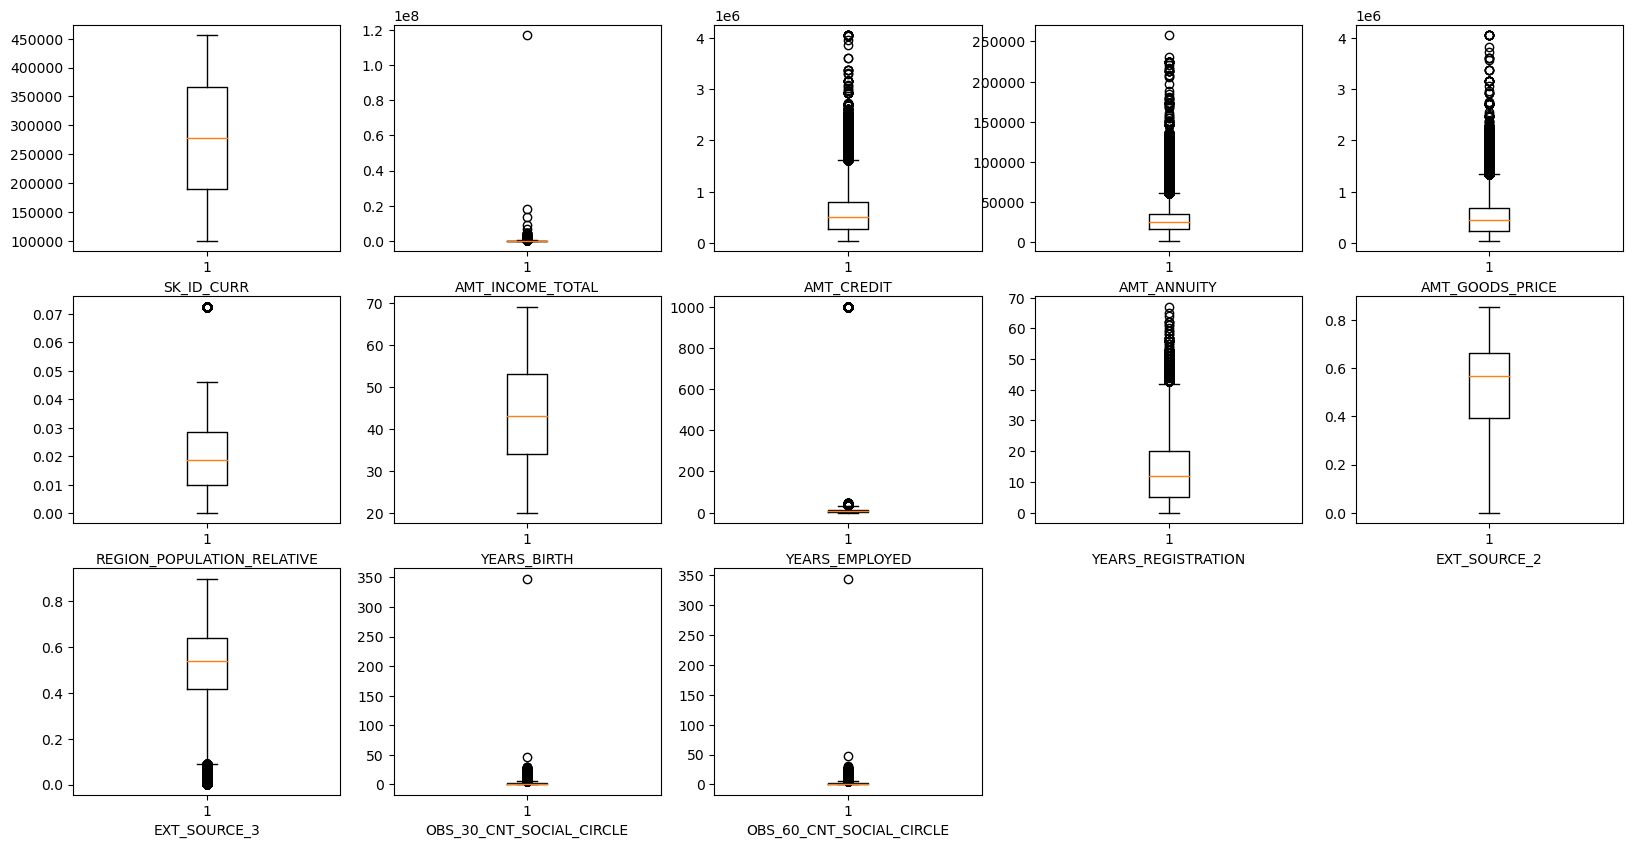

In [38]:
# Plotting Boxplots for the numerical columns to check the presence of outliers
x=1
plt.figure(figsize=[20,10])
for i in num_cols:
    plt.subplot(3,5,x)
    plt.boxplot(app_data[i])
    plt.xlabel(i)
    x=x+1
plt.show()

In [39]:
# Capping the outlier values to upper bound and lower bound values. q3 is the upper quartile while q1 is the lower quartile
# iqr is the inter-quartile range which is difference between q3 and q1
# Replacing the values higher than upper bound with upper bound values and lower values with lower bound
for i in num_cols:
    q3 = app_data[i].describe().loc['75%']
    q1 = app_data[i].describe().loc['25%']
    iqr = q3-q1
    ub = q3+1.5*iqr
    lb = q1-1.5*iqr
    app_data[i] = np.where(app_data[i]>ub,ub,app_data[i])
    app_data[i] = np.where(app_data[i]<lb,lb,app_data[i])

In [40]:
# Segmenting the dataframe  for TARGET = 0 and TARGET = 1
t0 = app_data[app_data['TARGET']==0]
t1 = app_data[app_data['TARGET']==1]

In [41]:
# Segmenting the columns into numerical and categorical columns  and assigning to num_t0_cols and cat_t0_cols respectively for TARGET=0
num_t0_cols=[]
cat_t0_cols=[]
for i in t0.columns:
    if t0[i].nunique()>30:
        num_t0_cols.append(i)
    else:
        cat_t0_cols.append(i)

In [42]:
# Segmenting the columns into numerical and categorical columns  and assigning to num_t1_cols and cat_t1_cols respectively for TARGET=1
num_t1_cols=[]
cat_t1_cols=[]
for i in t1.columns:
    if t1[i].nunique()>30:
        num_t1_cols.append(i)
    else:
        cat_t1_cols.append(i)

In [43]:
# Removing the column ORGANIZATION_TYPE from numerical column and adding it to categorical column
num_t0_cols.remove('ORGANIZATION_TYPE')
cat_t0_cols.append('ORGANIZATION_TYPE')
num_t1_cols.remove('ORGANIZATION_TYPE')
cat_t1_cols.append('ORGANIZATION_TYPE')

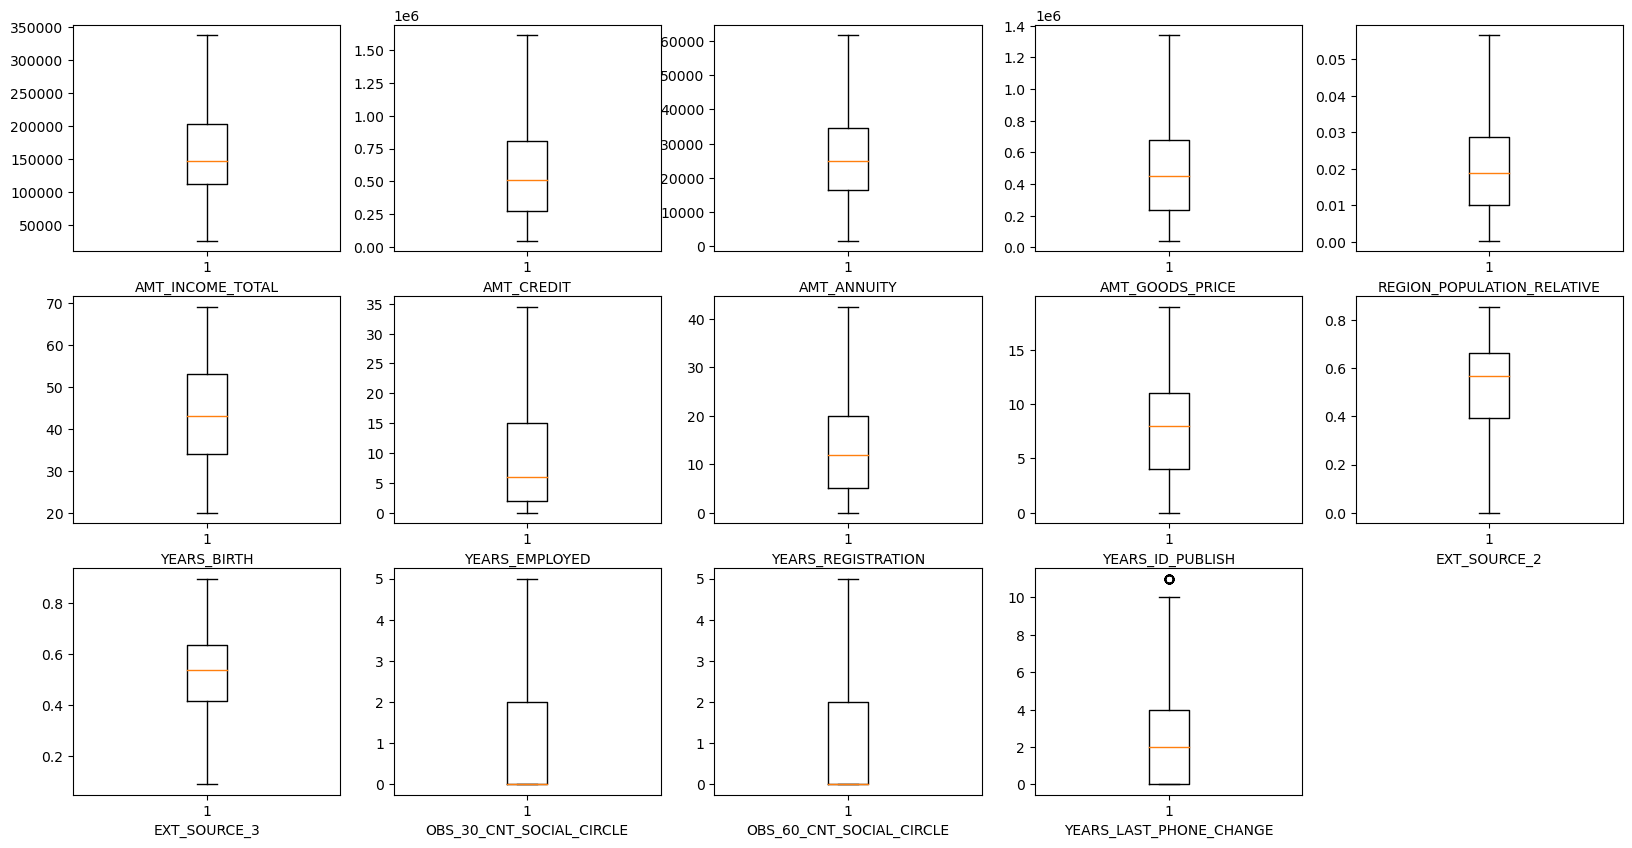

In [44]:
# Defining the num_cols variable without SK_ID_CURR column as finding outlier for that doesn't provide any meaningful insight
num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','YEARS_LAST_PHONE_CHANGE']
x=1
plt.figure(figsize=[20,10])
for i in num_cols:
    plt.subplot(3,5,x)
    plt.boxplot(app_data[i])
    plt.xlabel(i)
    x=x+1
plt.show()

### Segmented - Categorical univariate analysis

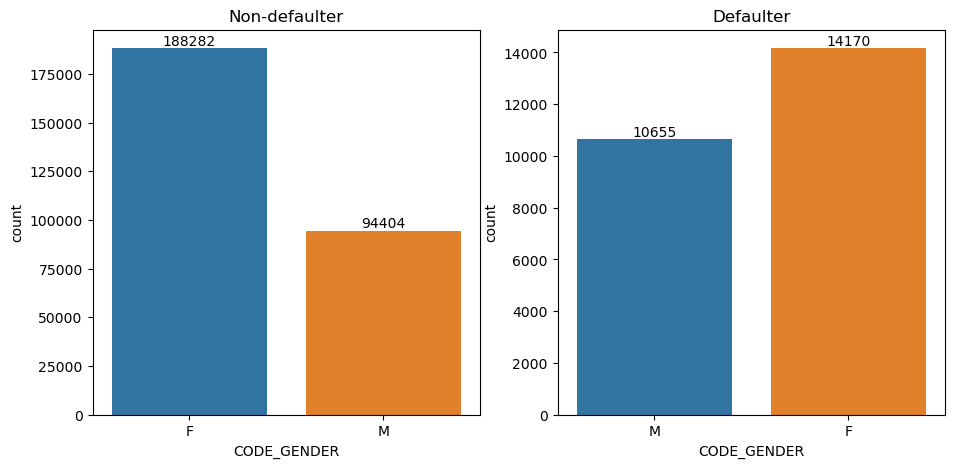

In [45]:
# Analysing CODE_GENDER column alone for both defaulters and non-defaulters
plt.figure(figsize=[11,5])

plt.subplot(1,2,1)
ax = sns.countplot(x=t0['CODE_GENDER'])
plt.title('Non-defaulter')

# The following 2 lines of code are responsible for the values being shown on top of bars
for container in ax.containers:     
    ax.bar_label(container)

plt.subplot(1,2,2)
ax = sns.countplot(x=t1['CODE_GENDER'])
plt.title('Defaulter')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

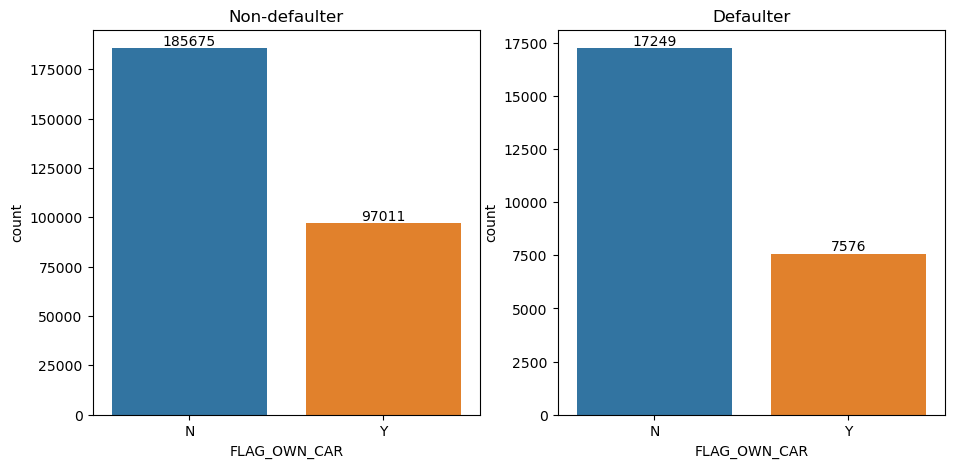

In [46]:
# Analysing FLAG_OWN_CAR column alone for both defaulters and non-defaulters

plt.figure(figsize=[11,5])

plt.subplot(1,2,1)
bx = sns.countplot(x=t0['FLAG_OWN_CAR'])
plt.title('Non-defaulter')

for container in bx.containers:
    bx.bar_label(container)
    

plt.subplot(1,2,2)
cx = sns.countplot(x=t1['FLAG_OWN_CAR'])
plt.title('Defaulter')

for container in cx.containers:
    cx.bar_label(container)

plt.show()

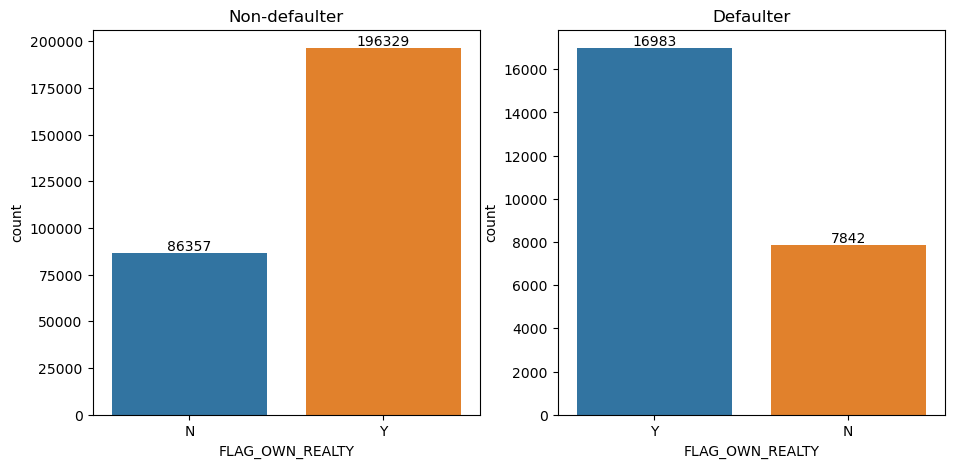

In [47]:
# Analysing FLAG_OWN_REALTY column alone for both defaulters and non-defaulters

plt.figure(figsize=[11,5])

plt.subplot(1,2,1)
dx = sns.countplot(x=t0['FLAG_OWN_REALTY'])
plt.title('Non-defaulter')

for container in dx.containers:
    dx.bar_label(container)

plt.subplot(1,2,2)
ex = sns.countplot(x=t1['FLAG_OWN_REALTY'])
plt.title('Defaulter')

for container in ex.containers:
    ex.bar_label(container)

plt.show()

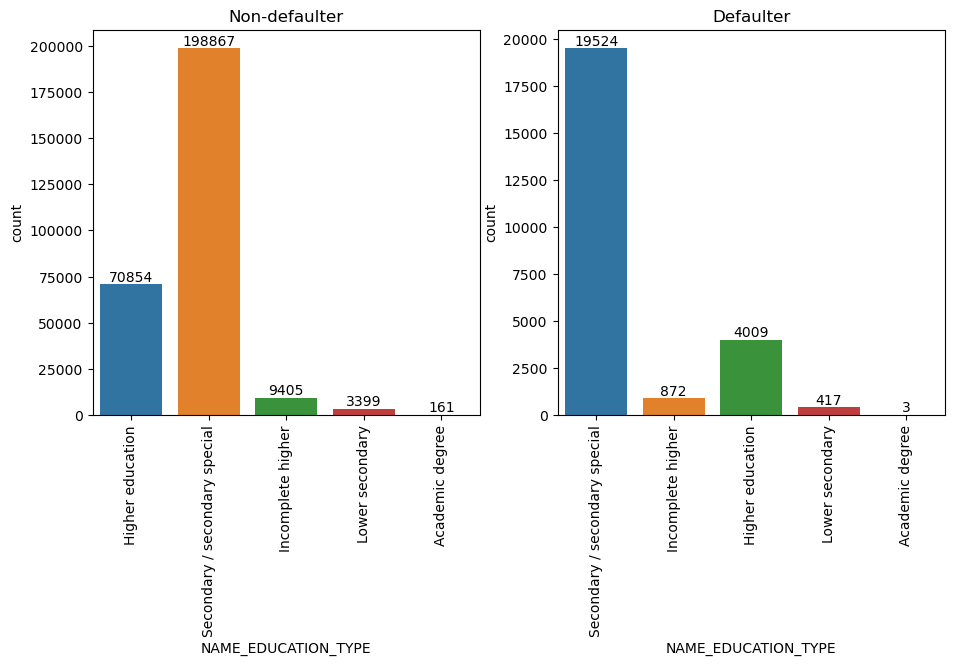

In [48]:
# Analysing NAME_EDUCATION_TYPE column alone for both defaulters and non-defaulters

plt.figure(figsize=[11,5])

plt.subplot(1,2,1)
fx = sns.countplot(x=t0['NAME_EDUCATION_TYPE'])
plt.title('Non-defaulter')
plt.xticks(rotation=90)

for container in fx.containers:
    fx.bar_label(container)

plt.subplot(1,2,2)
gx = sns.countplot(x=t1['NAME_EDUCATION_TYPE'])

for container in gx.containers:
    gx.bar_label(container)

plt.title('Defaulter')
plt.xticks(rotation=90)
plt.show()

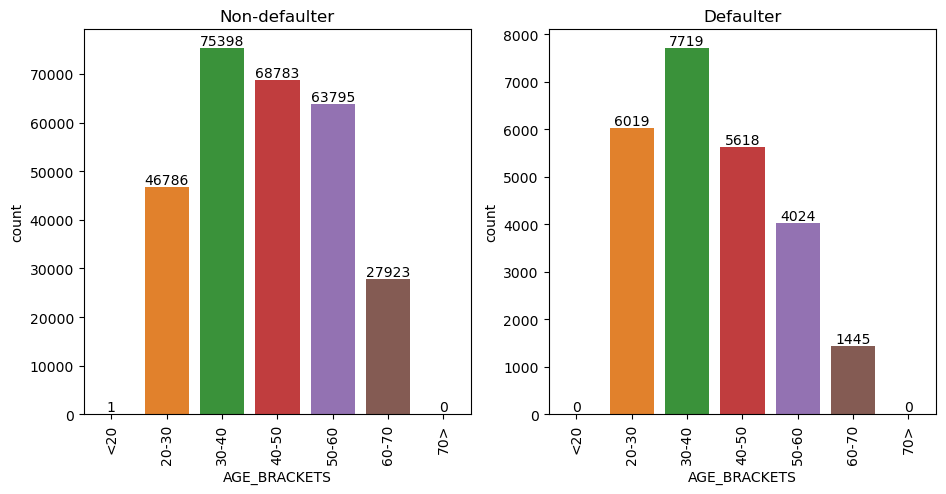

In [49]:
# Analysing AGE_BRACKETS column alone for both defaulters and non-defaulters

plt.figure(figsize=[11,5])

plt.subplot(1,2,1)
hx = sns.countplot(x=t0['AGE_BRACKETS'])

for container in hx.containers:
    hx.bar_label(container)

plt.title('Non-defaulter')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
ix = sns.countplot(x=t1['AGE_BRACKETS'])

for container in ix.containers:
    ix.bar_label(container)
    

plt.title('Defaulter')
plt.xticks(rotation=90)
plt.show()

### Segmented - Numerical univariate analysis

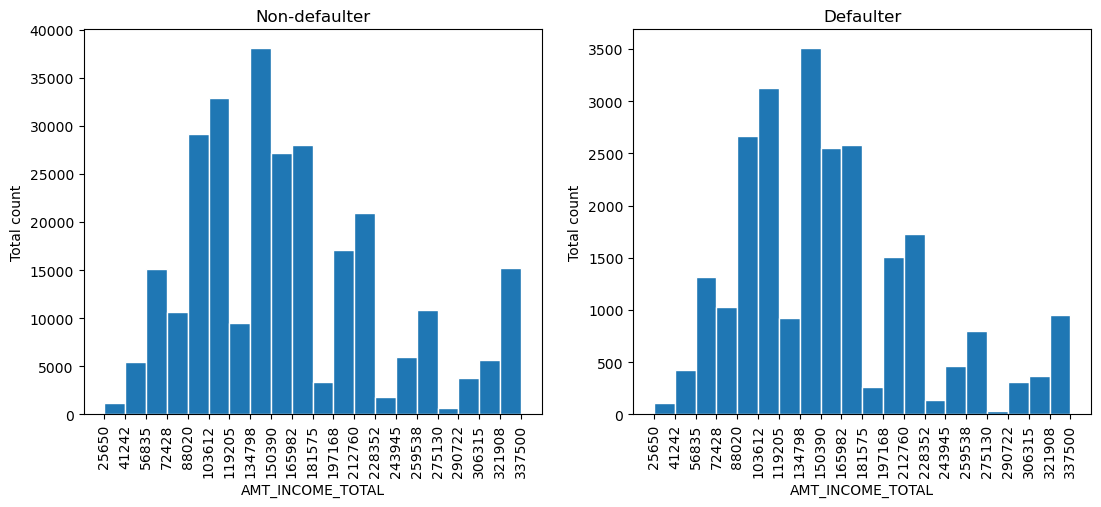

In [50]:
# Analysing AMT_INCOME_TOTAL column alone for both defaulters and non-defaulters

plt.figure(figsize=[13,5])

plt.subplot(1,2,1)

out1,bins1,out2 = plt.hist(x='AMT_INCOME_TOTAL',data=t0,bins=20,edgecolor='white')
plt.title('Non-defaulter')
plt.xticks(bins1,rotation=90)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Total count')

plt.subplot(1,2,2)
out1,bins2,out2 = plt.hist(x='AMT_INCOME_TOTAL',data=t1,bins=20,edgecolor='white')
plt.title('Defaulter')
plt.xticks(bins2,rotation=90)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Total count')

plt.show()

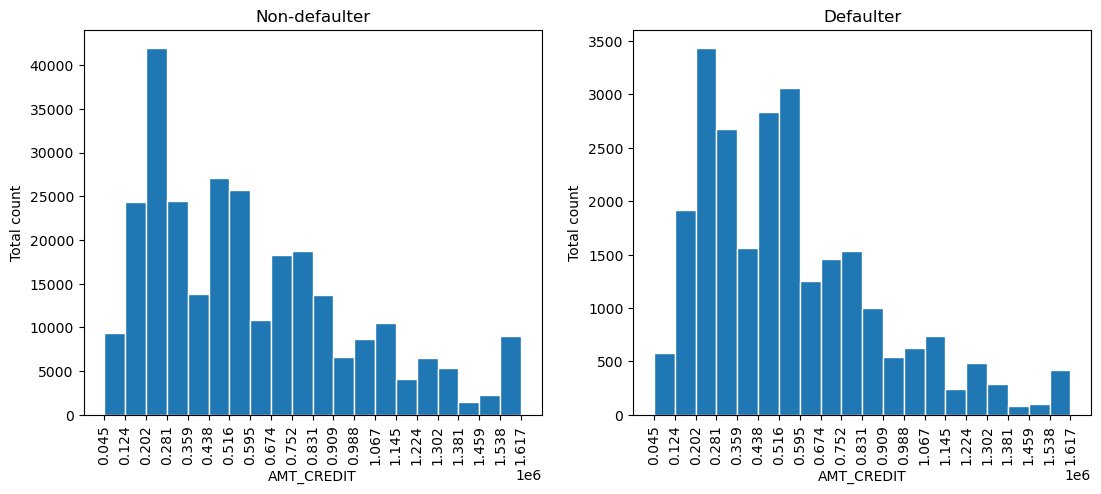

In [51]:
# Analysing AMT_CREDIT column alone for both defaulters and non-defaulters

plt.figure(figsize=[13,5])

plt.subplot(1,2,1)

out1,bins1,out2 = plt.hist(x='AMT_CREDIT',data=t0,bins=20,edgecolor='white')
plt.title('Non-defaulter')
plt.xticks(bins1,rotation=90)
plt.xlabel('AMT_CREDIT')
plt.ylabel('Total count')

plt.subplot(1,2,2)

out1,bins2,out2 = plt.hist(x='AMT_CREDIT',data=t1,bins=20,edgecolor='white')
plt.title('Defaulter')
plt.xticks(bins2,rotation=90)
plt.xlabel('AMT_CREDIT')
plt.ylabel('Total count')

plt.show()

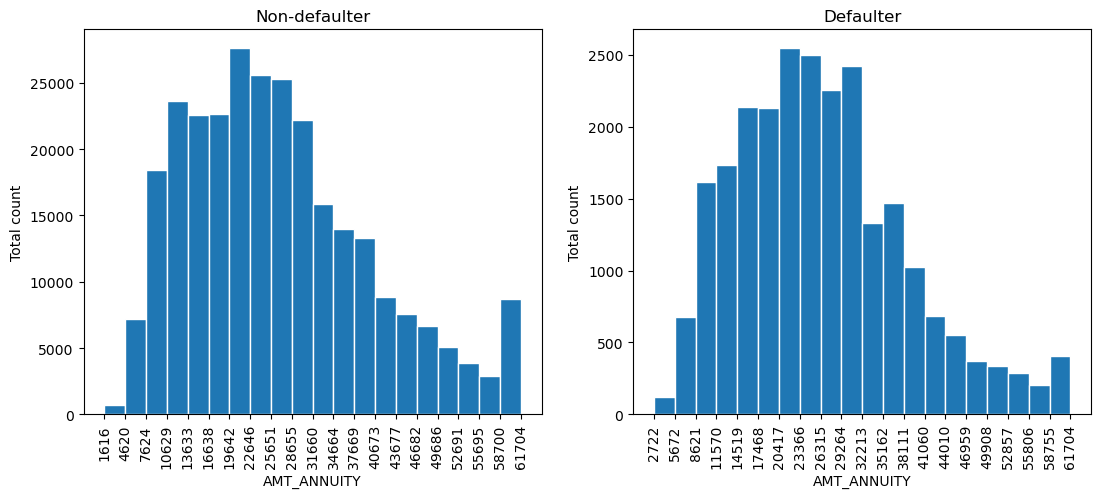

In [52]:
# Analysing AMT_ANNUITY column alone for both defaulters and non-defaulters

plt.figure(figsize=[13,5])

plt.subplot(1,2,1)

out1,bins1,out2 = plt.hist(x='AMT_ANNUITY',data=t0,bins=20,edgecolor='white')
plt.title('Non-defaulter')
plt.xticks(bins1,rotation=90)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Total count')

plt.subplot(1,2,2)

out1,bins2,out2 = plt.hist(x='AMT_ANNUITY',data=t1,bins=20,edgecolor='white')
plt.title('Defaulter')
plt.xticks(bins2,rotation=90)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Total count')

plt.show()

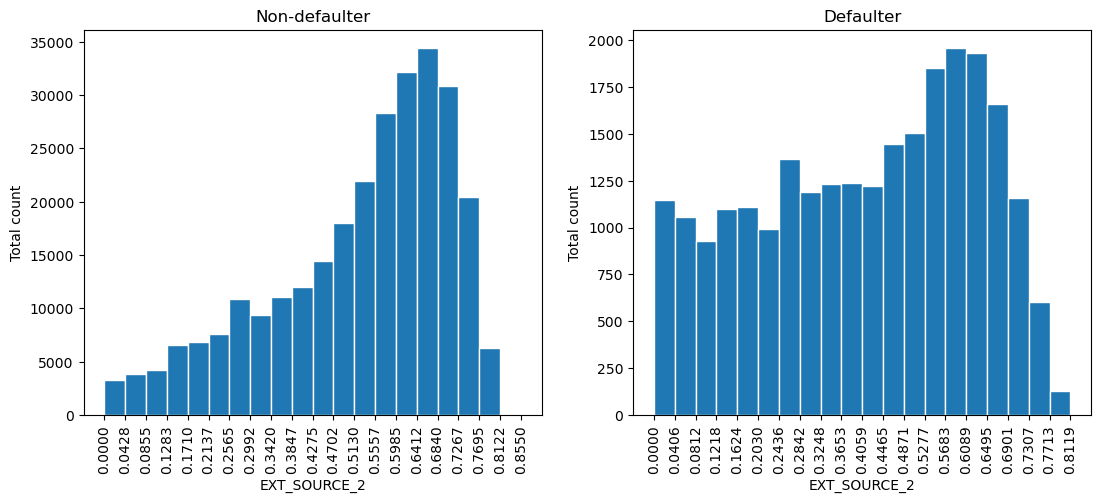

In [53]:
# Analysing EXT_SOURCE_2 column alone for both defaulters and non-defaulters

plt.figure(figsize=[13,5])

plt.subplot(1,2,1)

out1,bins1,out2 = plt.hist(x='EXT_SOURCE_2',data=t0,bins=20,edgecolor='white')
plt.title('Non-defaulter')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Total count')
plt.xticks(bins1,rotation=90)

plt.subplot(1,2,2)

out1,bins2,out2 = plt.hist(x='EXT_SOURCE_2',data=t1,bins=20,edgecolor='white')
plt.title('Defaulter')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Total count')
plt.xticks(bins2,rotation=90)

plt.show()

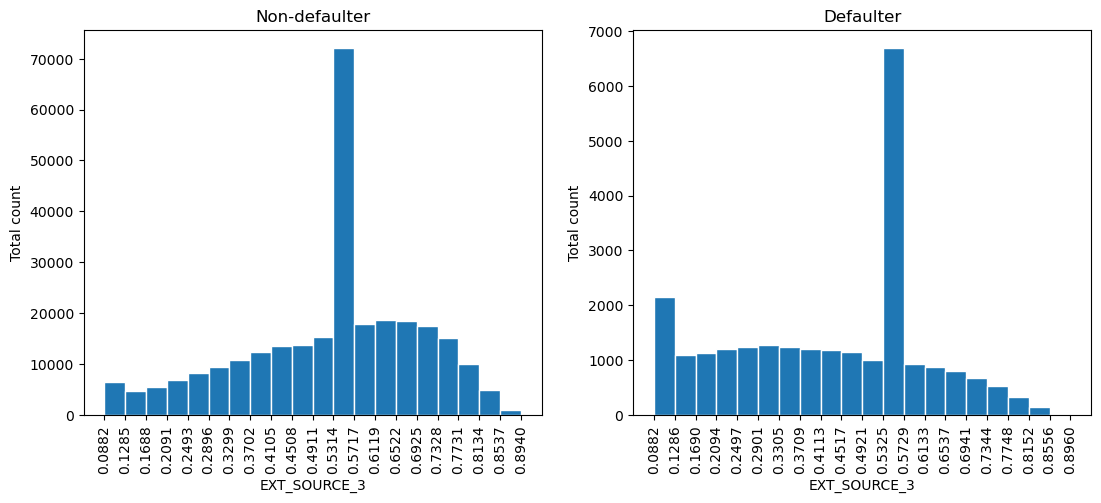

In [54]:
# Analysing EXT_SOURCE_3 column alone for both defaulters and non-defaulters

plt.figure(figsize=[13,5])

plt.subplot(1,2,1)

out1,bins1,out2 = plt.hist(x='EXT_SOURCE_3',data=t0,bins=20,edgecolor='white')
plt.title('Non-defaulter')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Total count')
plt.xticks(bins1,rotation=90)

plt.subplot(1,2,2)

out1,bins2,out2 = plt.hist(x='EXT_SOURCE_3',data=t1,bins=20,edgecolor='white')
plt.title('Defaulter')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Total count')
plt.xticks(bins2,rotation=90)

plt.show()

### Bi-variate analysis

#### Numerical v/s Numerical

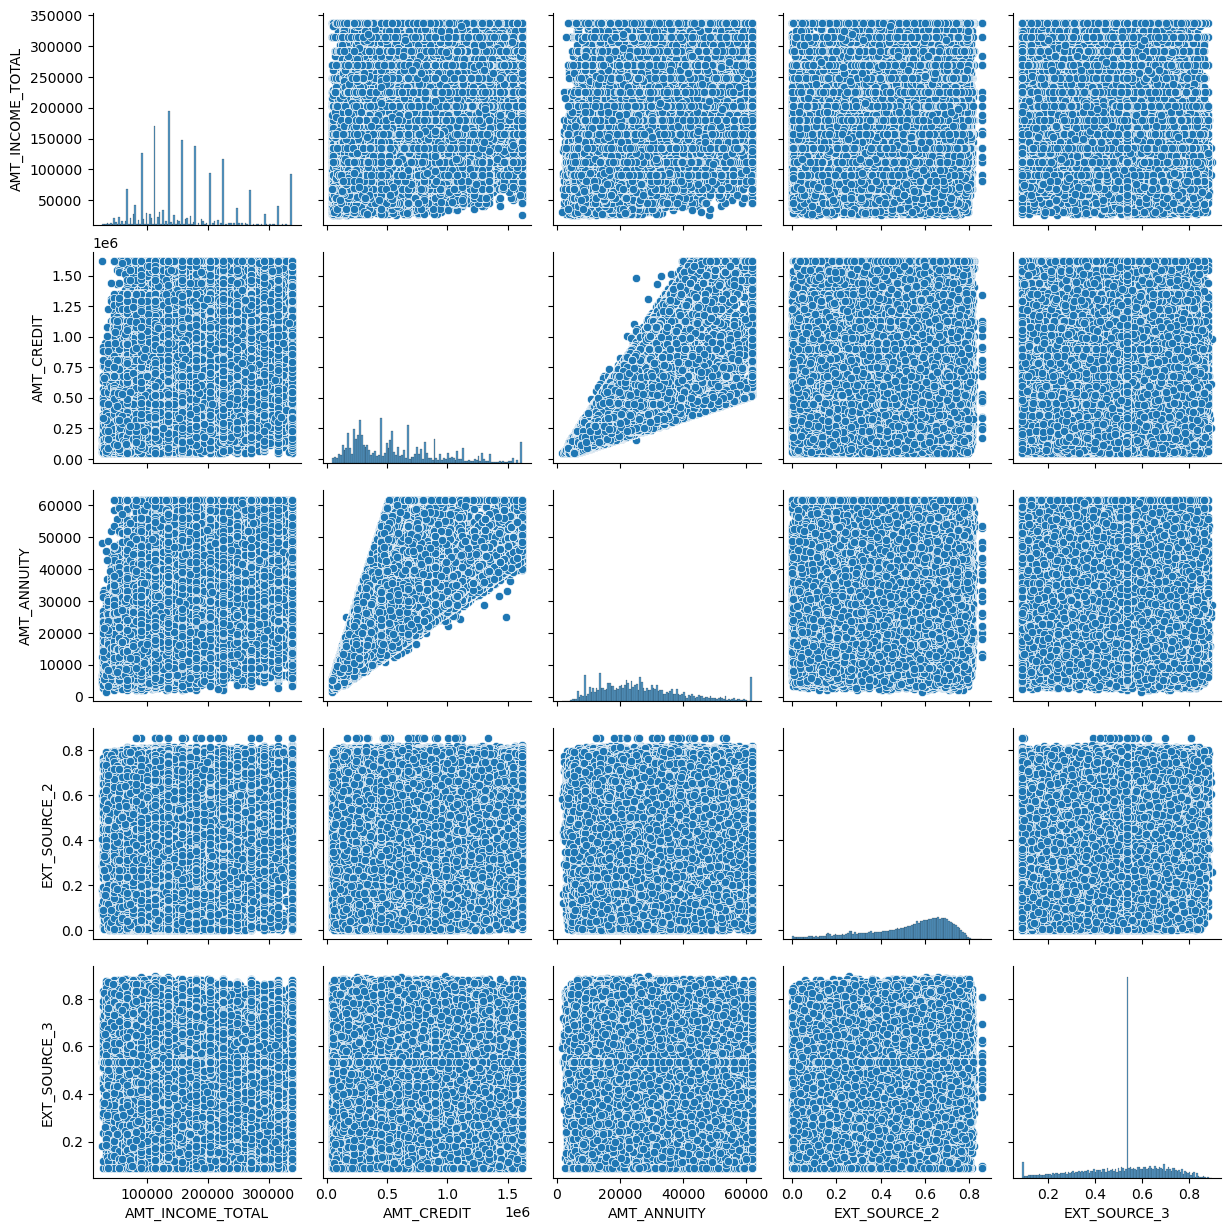

In [84]:
#Plotting various numerical variables against each other to derive insights

num_plot_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','EXT_SOURCE_2','EXT_SOURCE_3']
sns.pairplot(app_data[num_plot_cols])
plt.show()

#### Target variable vs Numerical columns

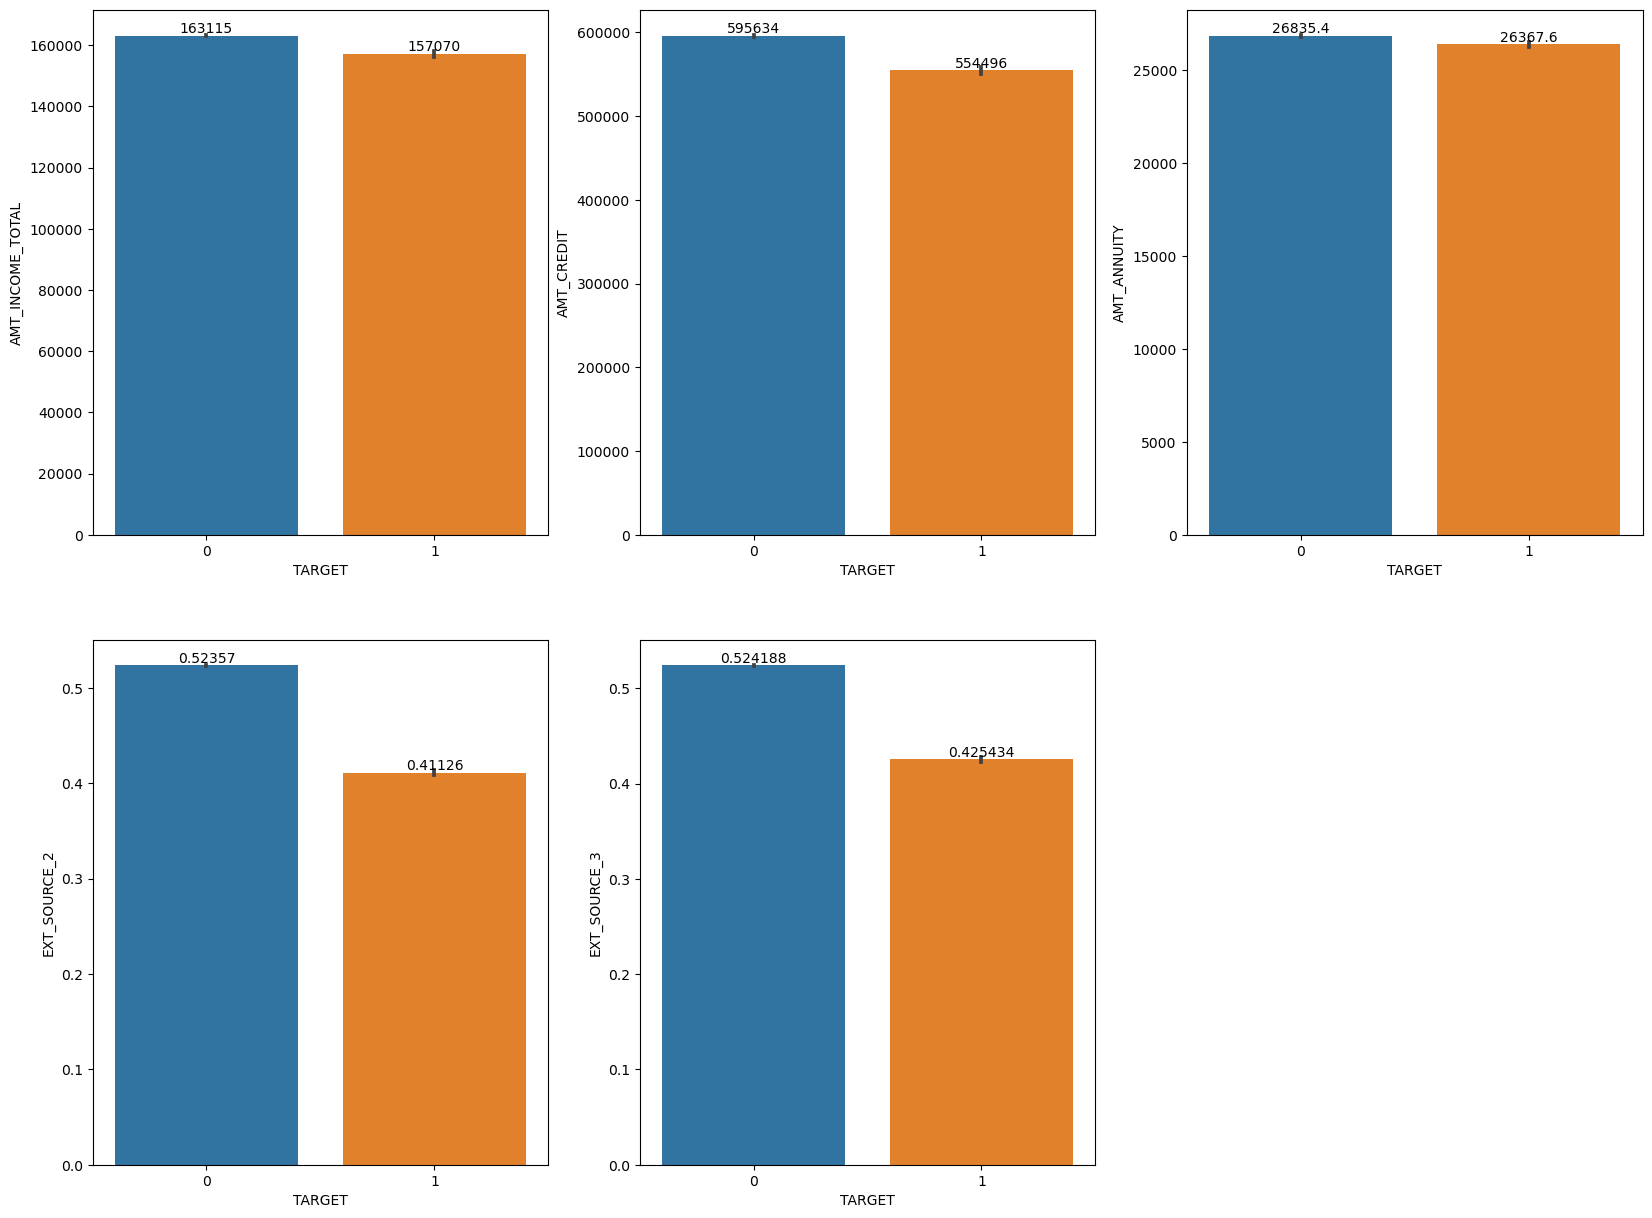

In [85]:
#Plotting target variable against various numerical columns to understand their relationship
c=1
plt.figure(figsize=[20,15])

for i in num_plot_cols:
    plt.subplot(2,3,c)
    ax = sns.barplot(x = 'TARGET',y=i,data=app_data)
    for container in ax.containers:
        ax.bar_label(container)
    c+=1
    
plt.show()

#### Target variable vs Numerical columns(Boxplots)

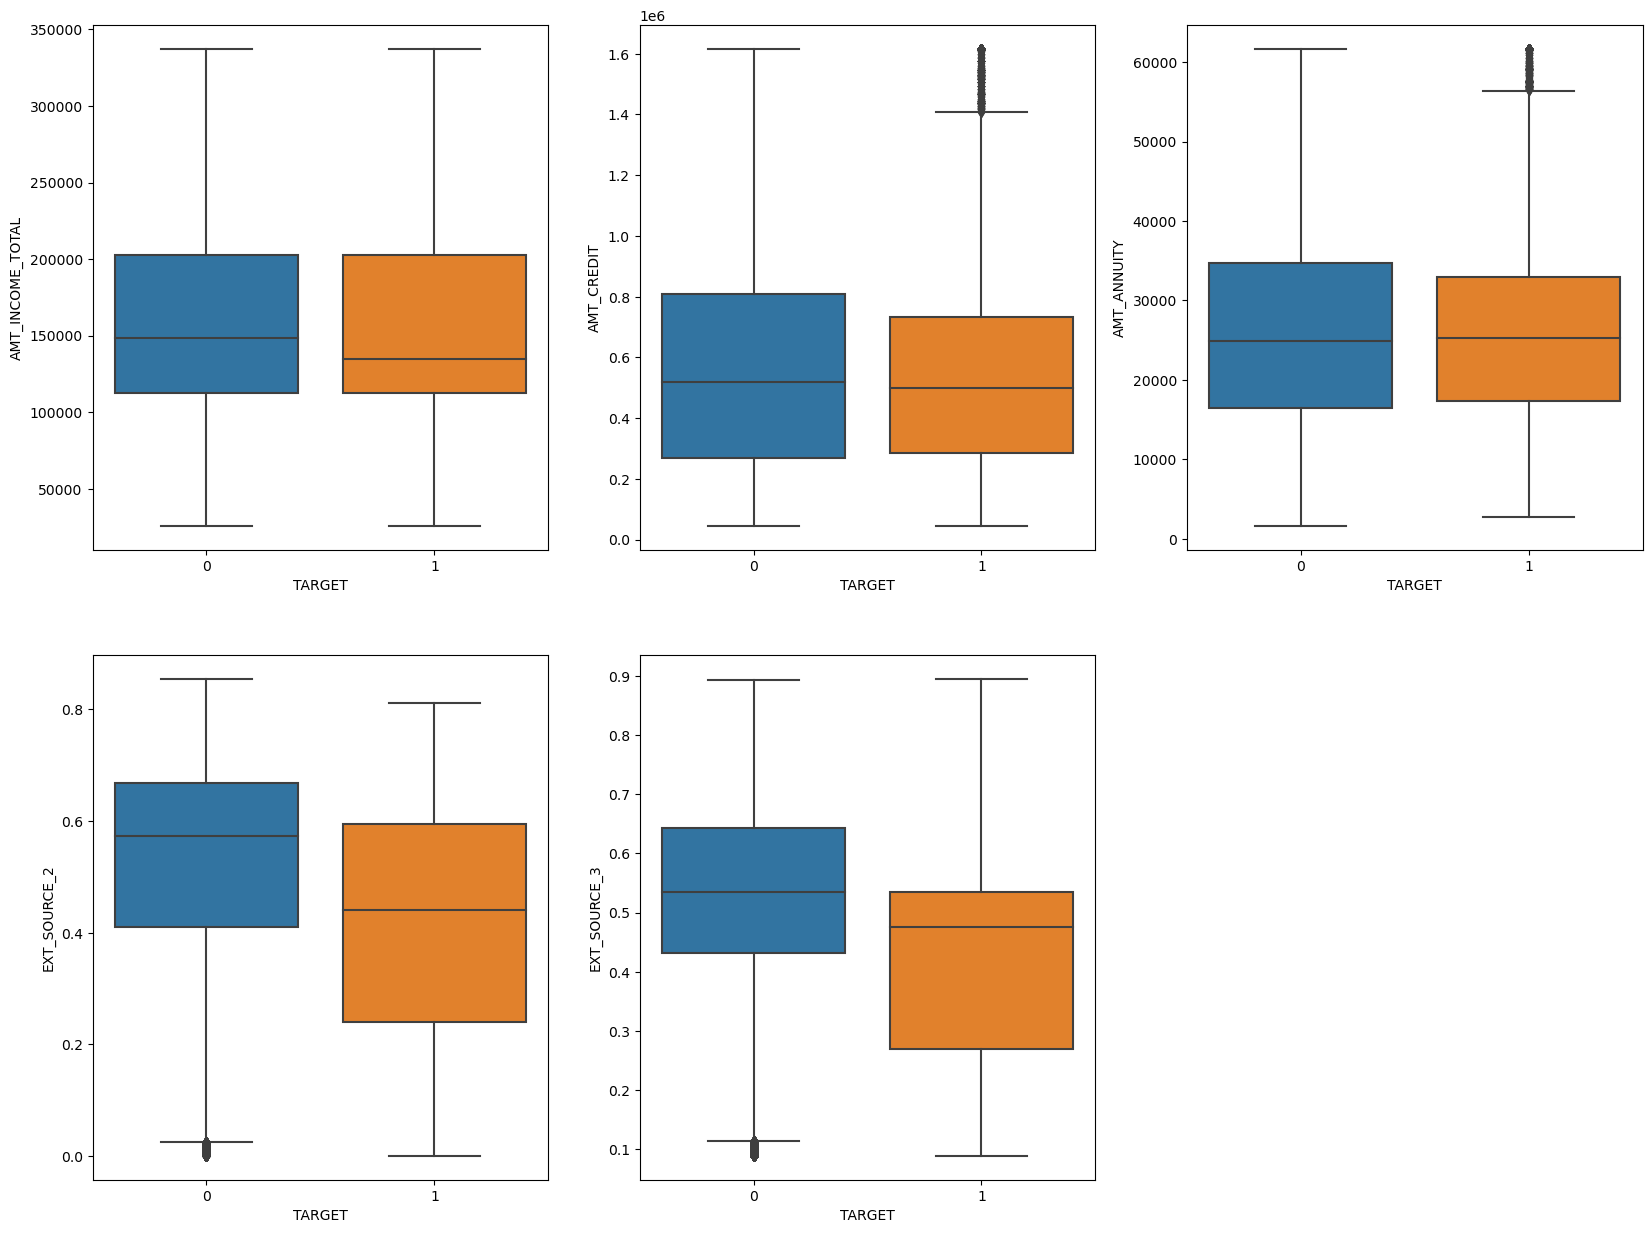

In [86]:
# Analysing various numerical columns with target variable using boxplots  

d=1
plt.figure(figsize=[20,15])

for i in num_plot_cols:
    plt.subplot(2,3,d)
    sns.boxplot(x = app_data['TARGET'],y=app_data[i])
    d+=1

plt.show()

Boxplots are helping us infer the following:

1.Median of the credit amount for both defaulters and non-defaulters are very much similar.

2.Median of the annual amount paid by both defaulters and non-defaulters are very much similar.

3.Ratings by external sources are better for non-defaulters compared to defaulters.

#### Target variables v/s categorical columns

In [87]:
# Creating a list cat_plot_cols to store the categorical columns which we will plot in the future analysis.

cat_plot_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','AGE_BRACKETS']

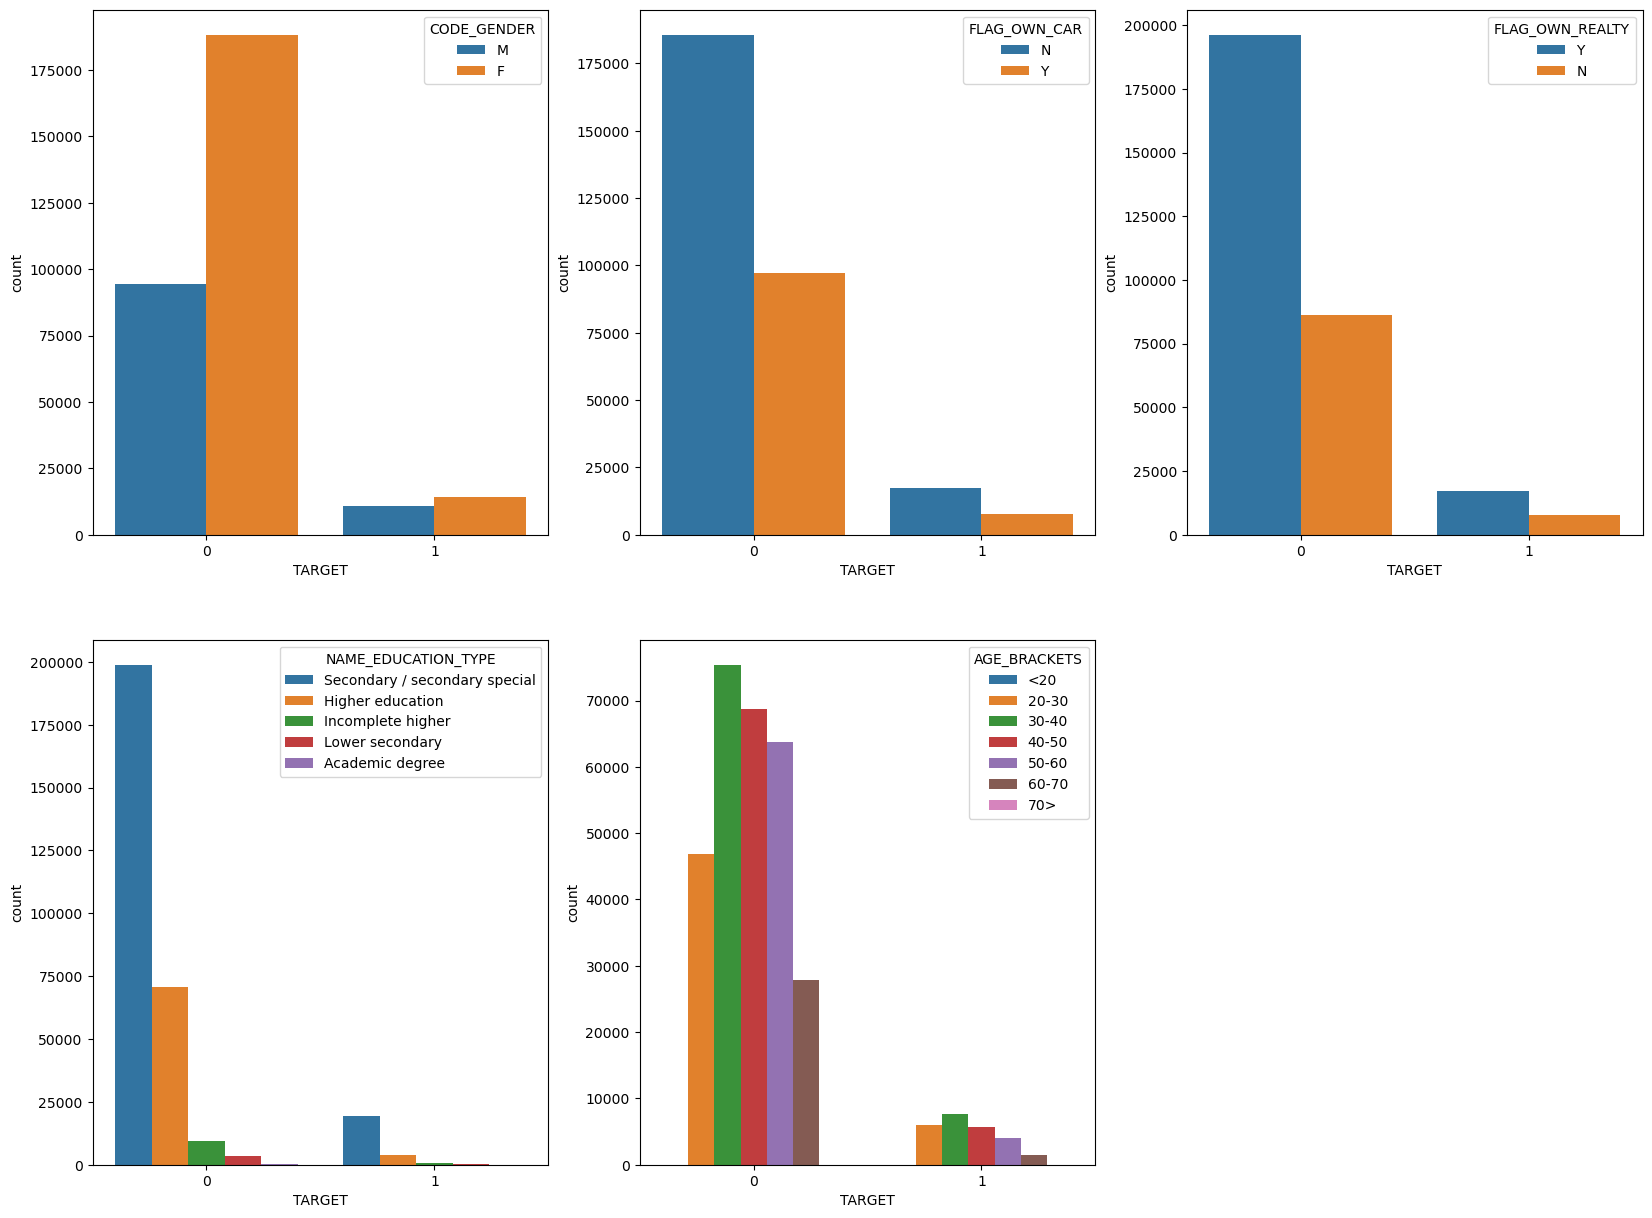

In [88]:
#Plotting  target variable against various categorical columns to understand their relationship
a=1
plt.figure(figsize=[20,15])

for i in cat_plot_cols:
    plt.subplot(2,3,a)
    sns.countplot(x=app_data['TARGET'],hue=app_data[i])
    a+=1

plt.show()

Above graphs help us understand the following points:

1.Female clients are paying loans better compared to male clients, but while seeing the defaulters female clients are slightly more than male clients.

2.Among non-defaulters large number of people are not having cars,while  for defaulters the number of car owners is only slightly less than the non-car owners.

3.Clients having a house or flat are more prompt in paying loans.

4.Among non-defaulters large number of people are having secondary education,whilefor defaulters people having secondary education are just slightly greater compared to higher education clients.

5.People in the age bracket of 30-40 are more seriouly paying loans and are not defaulting that often compared to the times they pay the loan.

### Correlation

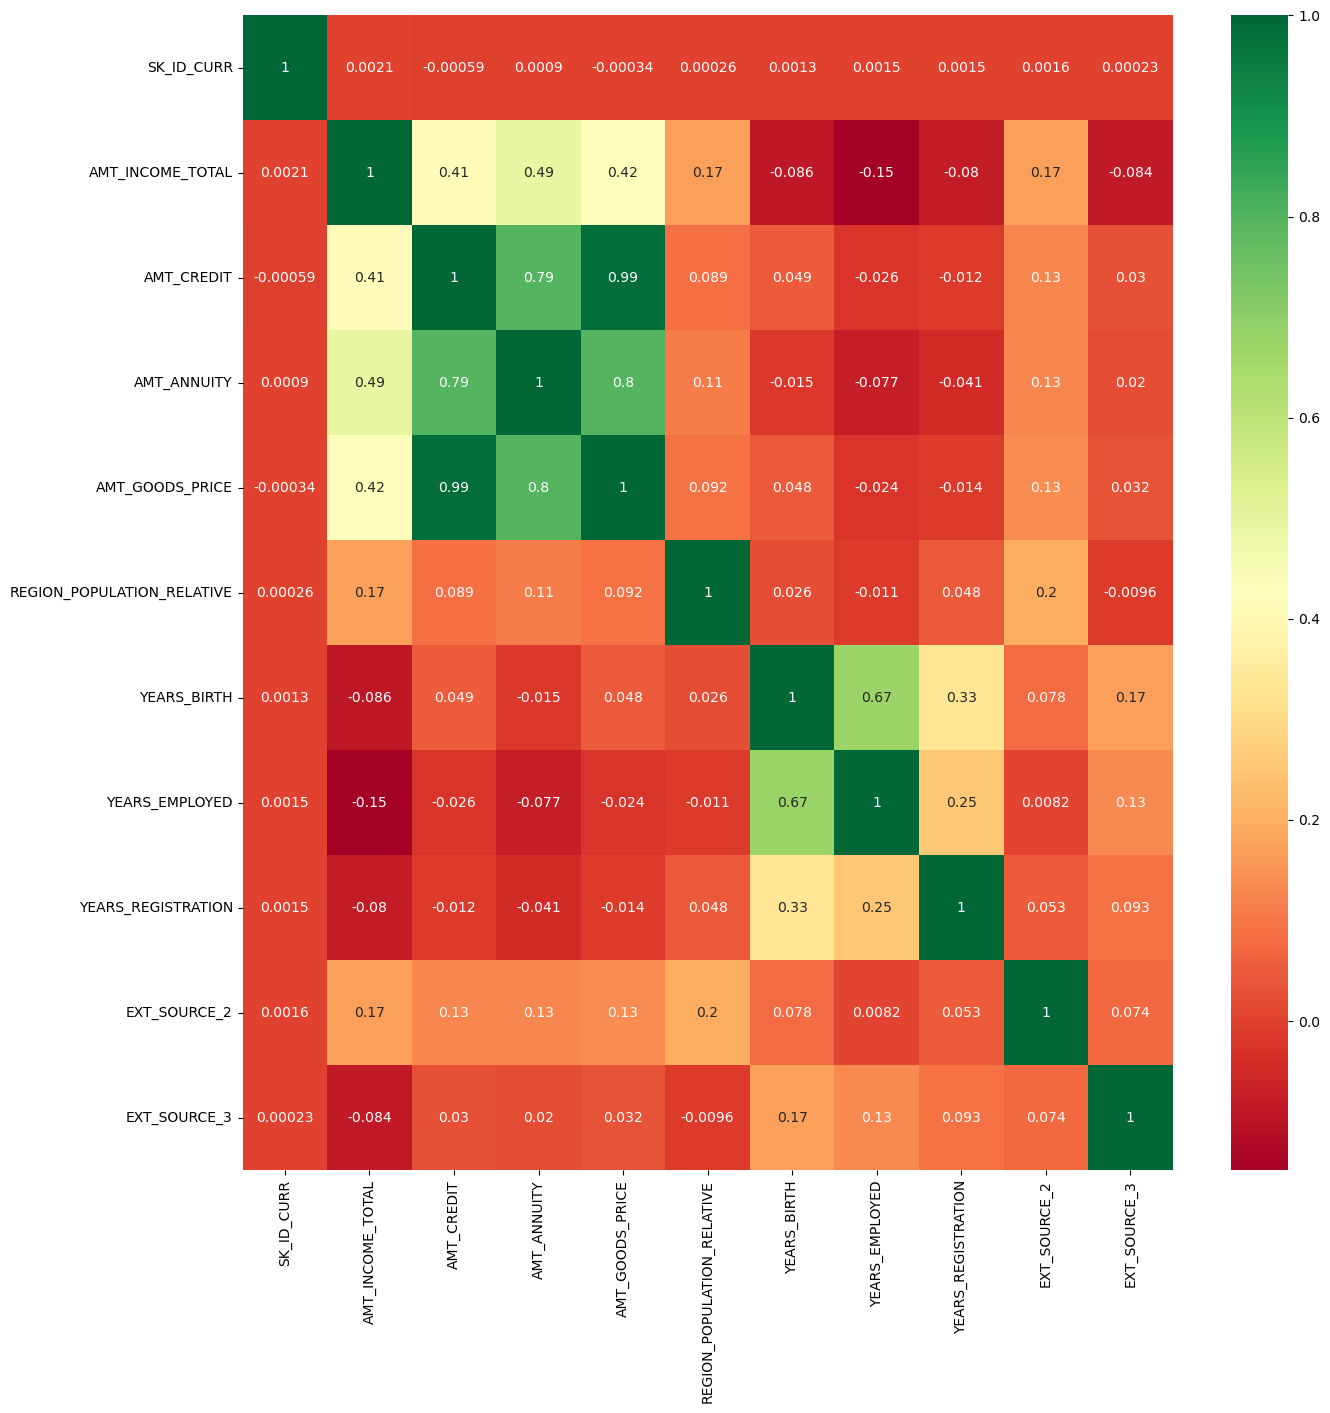

In [89]:
# Correlation for numerical columns of Target = 0 dataframe
plt.figure(figsize=[15,15])
sns.heatmap(t0[num_t0_cols].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [90]:
# corr0 stores the absolute values of correlation of numerical columns for the dataset having TARGET feature = 0

corr0 = t0[num_t0_cols].corr().abs()

# unstacking the values of corr0 so that the values can be sorted

corr0 = corr0.unstack().sort_values(ascending = False)

# filtering the top 10 correlations 

top10 = corr0[corr0<1].unique()[:10]

# Dropping the duplicate values of the corr1

corr0.drop_duplicates().head(11)

SK_ID_CURR        SK_ID_CURR                    1.000000
AMT_CREDIT        AMT_GOODS_PRICE               0.985582
AMT_ANNUITY       AMT_GOODS_PRICE               0.797315
                  AMT_CREDIT                    0.794808
YEARS_EMPLOYED    YEARS_BIRTH                   0.674356
AMT_ANNUITY       AMT_INCOME_TOTAL              0.492921
AMT_INCOME_TOTAL  AMT_GOODS_PRICE               0.417592
                  AMT_CREDIT                    0.414309
YEARS_BIRTH       YEARS_REGISTRATION            0.332781
YEARS_EMPLOYED    YEARS_REGISTRATION            0.254248
EXT_SOURCE_2      REGION_POPULATION_RELATIVE    0.195567
dtype: float64

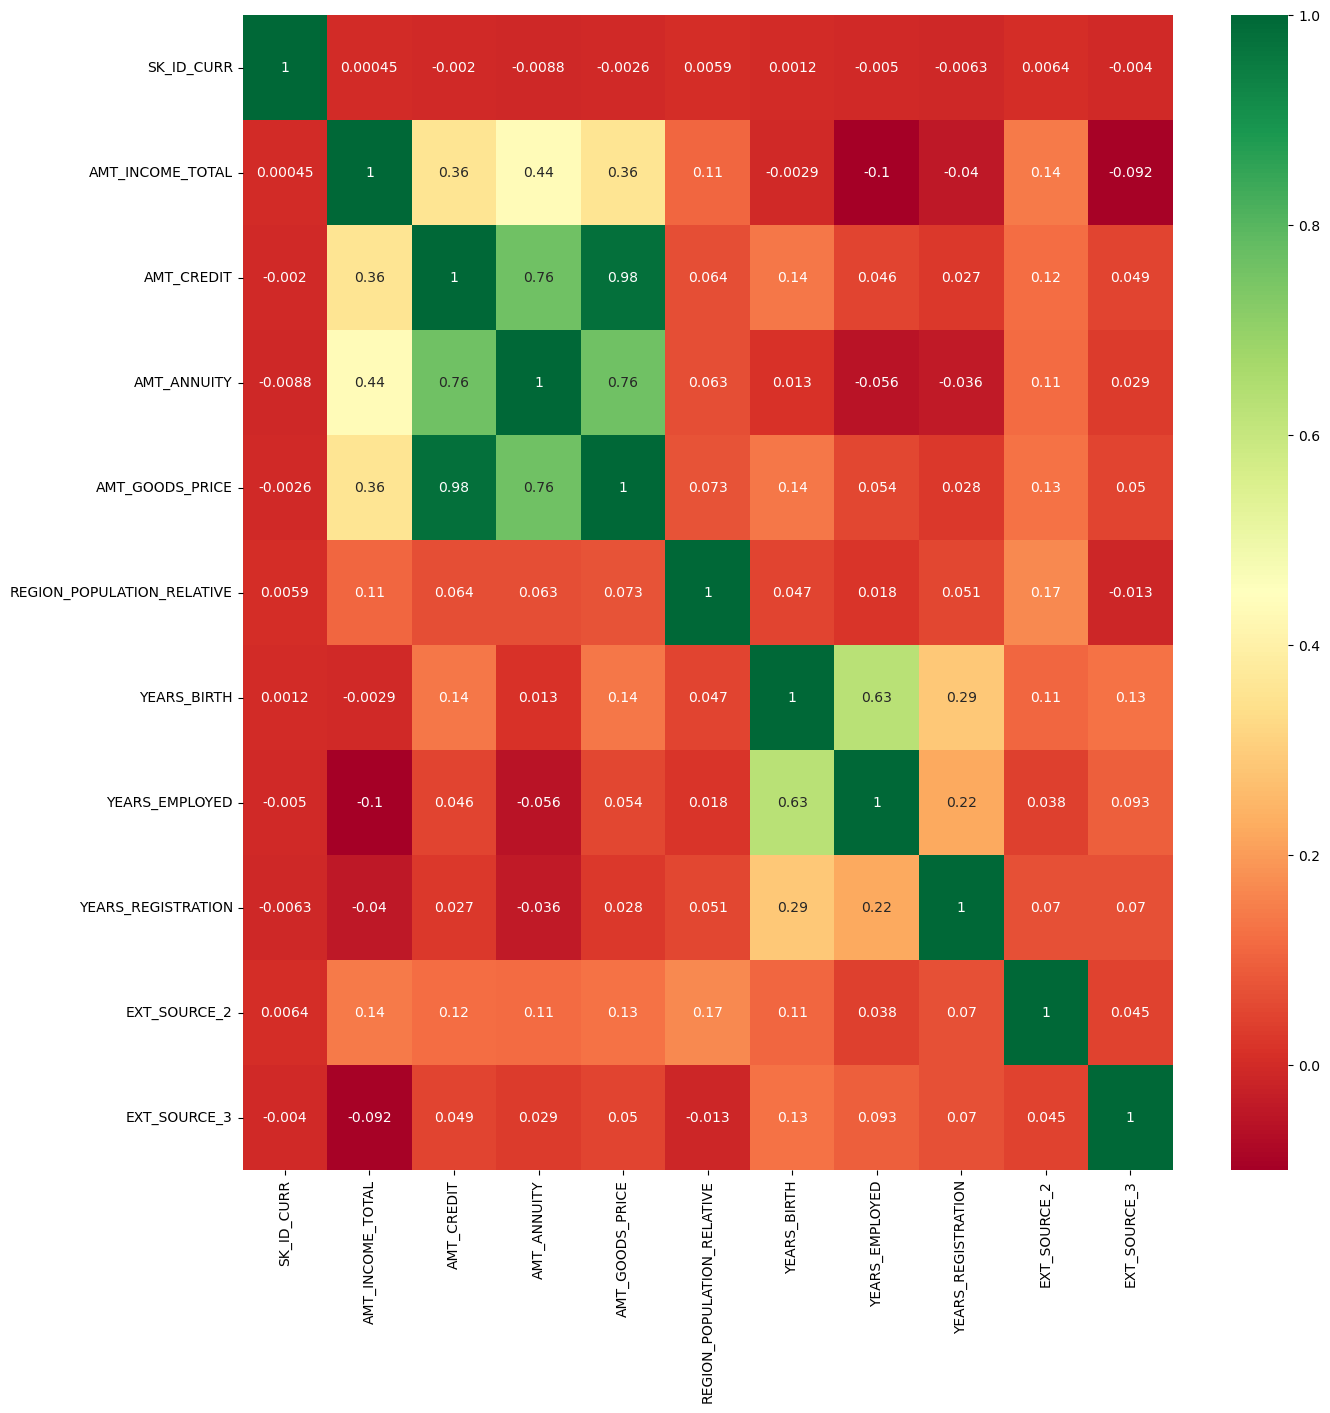

In [91]:
# Correlation for numerical columns of Target = 1 dataframe
plt.figure(figsize=[15,15])
sns.heatmap(t1[num_t1_cols].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [92]:
# corr1 stores the absolute values of correlation of numerical columns for the dataset having TARGET feature = 1
corr1 = t1[num_t1_cols].corr().abs()

# unstacking the values of corr1 so that the values can be sorted
corr1 = corr1.unstack().sort_values(ascending = False)


# Dropping the duplicate values of the corr1
# .head() function is given value 11 because the first value is of ID columns which is not useful
corr1.drop_duplicates().head(11)

SK_ID_CURR                  SK_ID_CURR          1.000000
AMT_GOODS_PRICE             AMT_CREDIT          0.981837
                            AMT_ANNUITY         0.760287
AMT_CREDIT                  AMT_ANNUITY         0.760123
YEARS_BIRTH                 YEARS_EMPLOYED      0.626650
AMT_ANNUITY                 AMT_INCOME_TOTAL    0.436918
AMT_GOODS_PRICE             AMT_INCOME_TOTAL    0.357696
AMT_CREDIT                  AMT_INCOME_TOTAL    0.356199
YEARS_REGISTRATION          YEARS_BIRTH         0.288794
                            YEARS_EMPLOYED      0.224188
REGION_POPULATION_RELATIVE  EXT_SOURCE_2        0.167309
dtype: float64

In [93]:
# Reading the previous application dataset into prev_app variable
prev_app = pd.read_csv('Downloads\\previous_application.csv')

In [94]:
# Calculcating the percentage of null values and assigning it to null_perc_app variable
null_perc_app = (prev_app.isna().mean()*100)

In [95]:
# Assigning the column names of columns with more than 40% null values to variable cols_to_drop
cols_to_drop = null_perc_app[null_perc_app>40].index

# Dropping the columns with more than 40% of null values
prev_app.drop(cols_to_drop,axis=1,inplace=True)

In [96]:
# Shape of the dataframe after dropping columns
prev_app.shape

(1670214, 26)

In [97]:
# Checking the statistical data of the prev_app dataset
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


### Standardizing values

We can observe from the above command that DAYS_DECISION column is having negative values so we would need to convert it to positive values and also it would be better to convert the days into years for gaining insights.

In [98]:
# Converting the negative values into positive values and converting the days to year 

prev_app['DAYS_DECISION'] = prev_app['DAYS_DECISION'].apply(lambda x:abs(x)//365)


In [99]:
# Renaming the column
prev_app.rename(columns={'DAYS_DECISION':'YEARS_DECISION'},inplace=True)

In [100]:
# Segregating the columns into categorical and numerical columns
num_cols_prev = []
cat_cols_prev = []
for i in prev_app.columns:
    if prev_app[i].nunique()>30:
        num_cols_prev.append(i)
    else:
        cat_cols_prev.append(i)

In [101]:
#Checking the percentage of null values in numerical columns
100*(prev_app[num_cols_prev].isna().mean())

SK_ID_PREV           0.000000
SK_ID_CURR           0.000000
AMT_ANNUITY         22.286665
AMT_APPLICATION      0.000000
AMT_CREDIT           0.000060
AMT_GOODS_PRICE     23.081773
SELLERPLACE_AREA     0.000000
CNT_PAYMENT         22.286366
dtype: float64

In [102]:
# Replacing the null values with the median of particular numerical columns
for i in num_cols_prev:
    if 100*(prev_app[i].isna().mean())>0:
        prev_app[i] = prev_app[i].fillna(prev_app[i].median())

In [103]:
# Replacing the null values with the mode of particular categorical column
for i in cat_cols_prev:
    if 100*(prev_app[i].isna().mean())>0:
        prev_app[i] = prev_app[i].fillna(prev_app[i].mode()[0])

### Analysis on merged dataset

In [104]:
# Merging the prev_app dataset with app_data and thereby creating merge_df as the merged dataframe
merge_df = app_data.merge(prev_app,on='SK_ID_CURR',how='inner')

In [105]:
# Viewing the shape of merged dataframe
merge_df.shape

(1413701, 79)

In [106]:
# Adding the columns with _x to list x and columns with _y to list y
x=[]
y=[]
for i in merge_df.columns:
    if '_x' in i:
        x.append(i)
    elif '_y' in i:
        y.append(i)

In [107]:
# As the features with _x belongs to app_data , naming it as featurename_curr and the features with _y belongs to prev_app , naming it as featurename_prev
for i in x:
    merge_df.rename(columns={i:(i[:-1]+'curr')},inplace=True)

for j in y:
    merge_df.rename(columns={j:(j[:-1]+'prev')},inplace=True)

### Bi-variate analysis

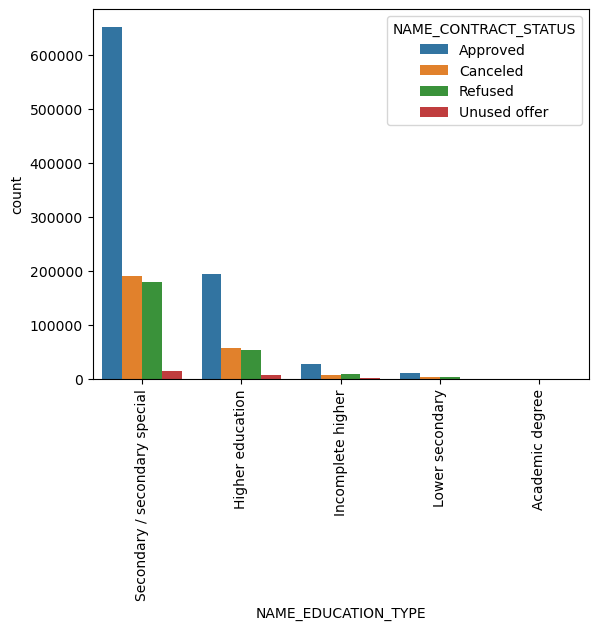

In [108]:
# Plotting education type with the contract status
sns.countplot(x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS',data=merge_df)

plt.xticks(rotation=90)

plt.show()

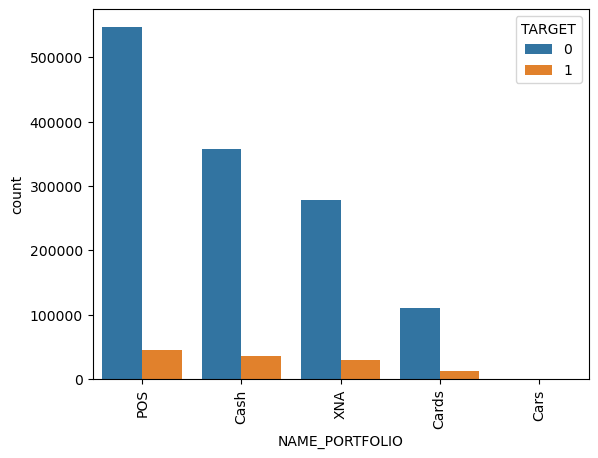

In [109]:
# Plotting portfolio with the target
sns.countplot(x='NAME_PORTFOLIO',hue='TARGET',data=merge_df)

plt.xticks(rotation=90)

plt.show()

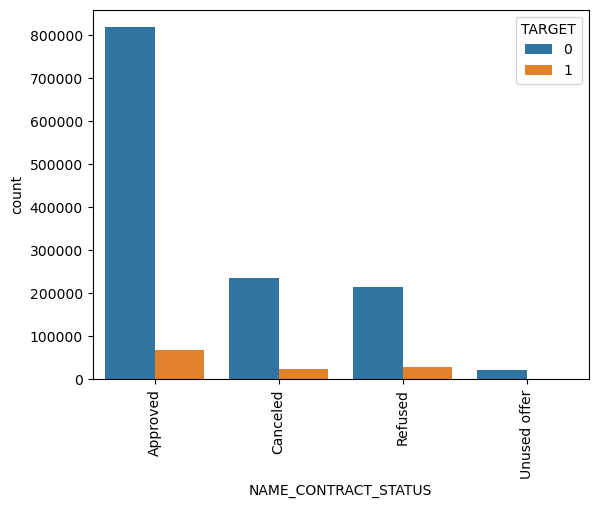

In [110]:
# Plotting contract status with the target
sns.countplot(x='NAME_CONTRACT_STATUS',hue='TARGET',data=merge_df)

plt.xticks(rotation=90)

plt.show()

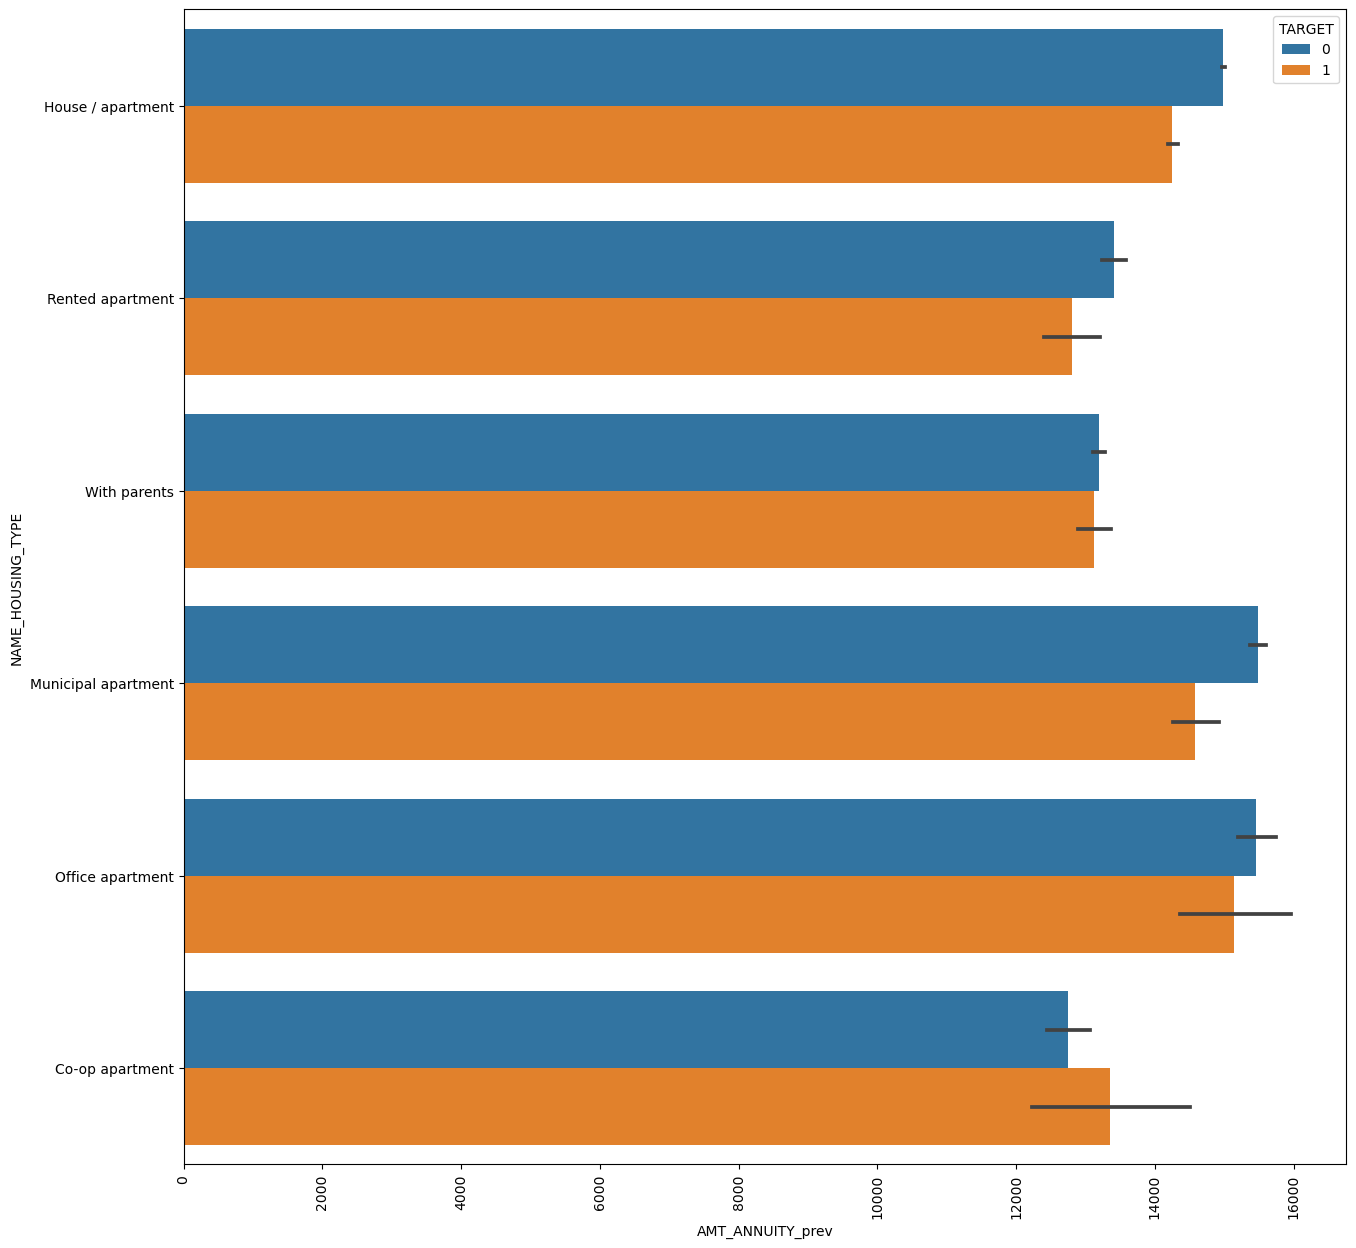

In [111]:
# Plotting previous amount annuity with housing type
plt.figure(figsize=[15,15])

sns.barplot(y='NAME_HOUSING_TYPE',x='AMT_ANNUITY_prev',hue='TARGET',data=merge_df)

plt.xticks(rotation=90)

plt.show()
